# Node2Vec

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# 数据加载，构造图
G = nx.read_gml('dataset/football.gml')
print(type(G))
print(len(G))

<class 'networkx.classes.graph.Graph'>
115


In [4]:
# 初始化 Node2Vec 模型
model = Node2Vec(G, walk_length=10, num_walks=5, workers=1, p=0.1, q=5)

Computing transition probabilities:   0%|          | 0/115 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 5/5 [00:00<00:00, 442.63it/s]


In [5]:
# 模型训练
result = model.fit(window=4, min_count=1, batch_words=4)

In [6]:
# 得到节点的 embedding
print(result.wv.most_similar('EastCarolina'))
embeddings = result.wv
print(embeddings)

[('Houston', 0.9979113936424255), ('Army', 0.9978304505348206), ('Tulane', 0.9976492524147034), ('Louisville', 0.9976193904876709), ('SouthernMississippi', 0.9973435997962952), ('Memphis', 0.9967756867408752), ('Syracuse', 0.9963866472244263), ('Cincinnati', 0.9963841438293457), ('Navy', 0.9961967468261719), ('VirginiaTech', 0.9960501790046692)]
KeyedVectors<vector_size=128, 115 keys>


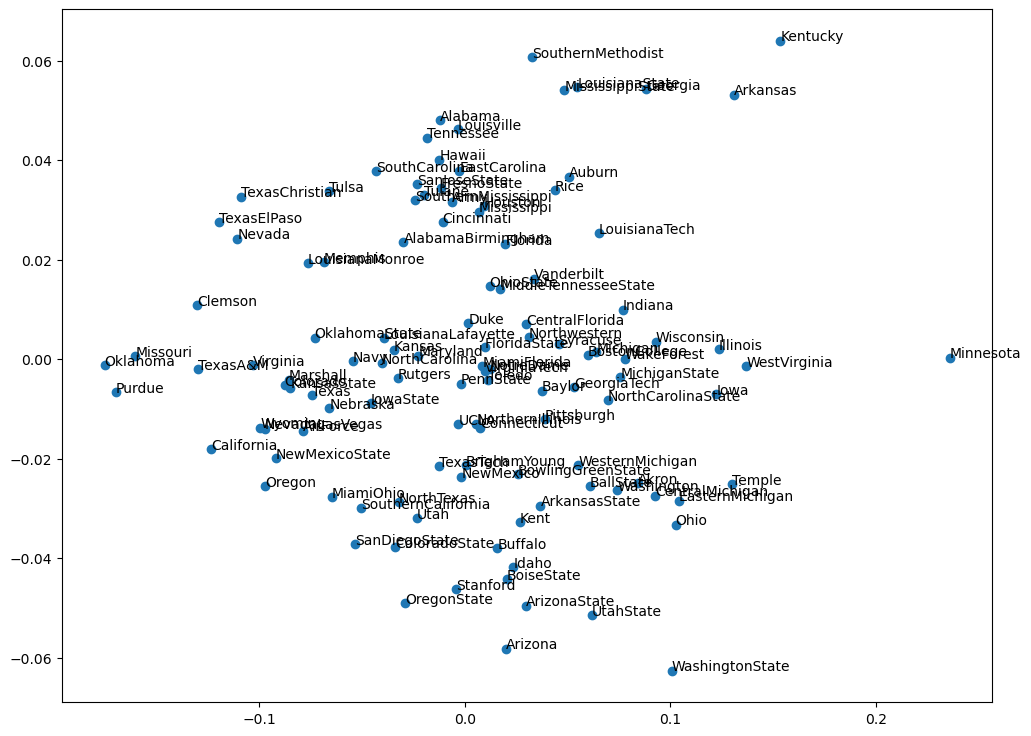

In [7]:
# 在二维空间中绘制所选节点的向量
def plot_nodes(word_list):
    # 每个节点的 embedding 为 100 维
    X = []
    for item in word_list:
        X.append(embeddings[item])
    #print(X.shape)
    # 将 100 维向量减少到 2 维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X) 
    #print(result)
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(list(word_list)):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))        
    plt.show()
    
plot_nodes(result.wv.index_to_key)
